In [46]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pip  
pip.main(['install', 'imutils'])
import imutils
from imutils.perspective import four_point_transform
from imutils import contours
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.0 


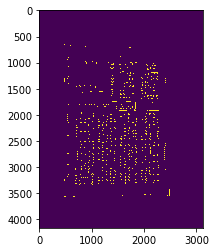

In [47]:
path='omr_pic.jpg'
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)
plt.imshow(blurred)
plt.imshow(edged)
plt.show()

In [48]:
# find contours in the edge map, then initialize
# the contour that corresponds to the document
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
docCnt = None
 
# ensure that at least one contour was found
if len(cnts) > 0:
	# sort the contours according to their size in
	# descending order
	cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
	# loop over the sorted contours
	for c in cnts:
		# approximate the contour
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
		# if our approximated contour has four points,
		# then we can assume we have found the paper
		if len(approx) == 4:
			docCnt = approx
			break

In [49]:
# apply a four point perspective transform to both the
# original image and grayscale image to obtain a top-down
# birds eye view of the paper
paper = four_point_transform(image, docCnt.reshape(4, 2))
warped = four_point_transform(gray, docCnt.reshape(4, 2))

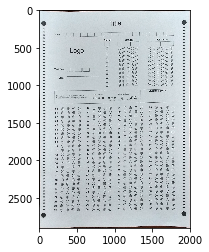

In [50]:
plt.imshow(paper)

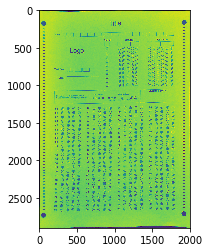

In [51]:
plt.imshow(warped)

In [52]:
# apply Otsu's thresholding method to binarize the warped
# piece of paper
thresh = cv2.threshold(warped, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

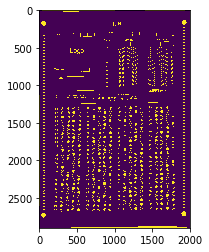

In [53]:
plt.imshow(thresh)
plt.show()

In [54]:
height=np.size(thresh,0)

In [55]:
width=np.size(thresh,1)

In [56]:
height

2898

In [57]:
width

2002

In [58]:
img1=thresh[1280:2690,200:600]

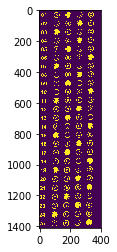

In [59]:
plt.imshow(img1)
plt.show()

In [60]:
img2=thresh[1270:2680,600:1000]

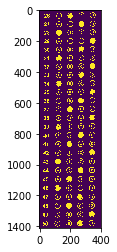

In [61]:
plt.imshow(img2)
plt.show()

In [62]:
img3=thresh[1270:2670,1000:1400]

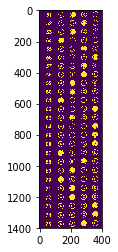

In [63]:
plt.imshow(img3)
plt.show()

In [64]:
img4=thresh[1260:2670,1410:1810]

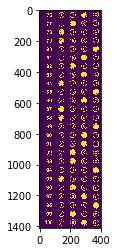

In [65]:
plt.imshow(img4)
plt.show()

In [66]:
questions=[]

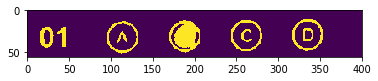

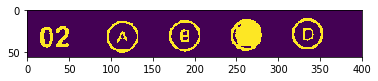

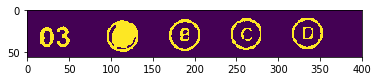

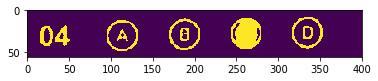

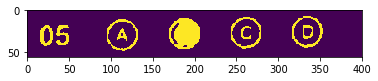

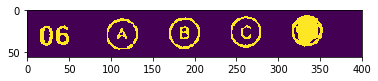

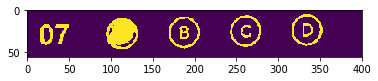

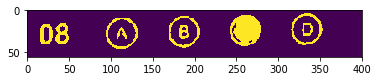

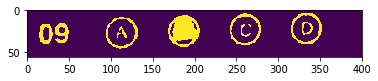

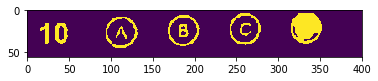

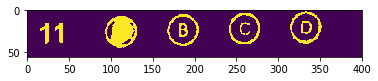

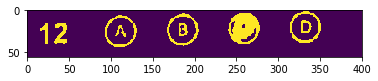

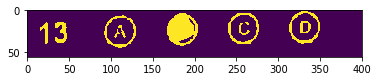

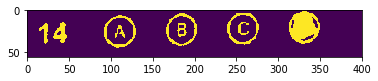

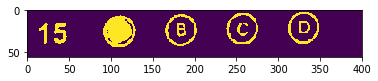

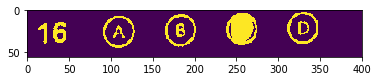

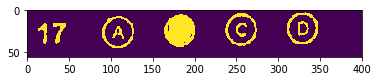

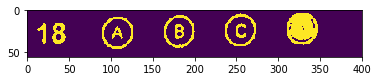

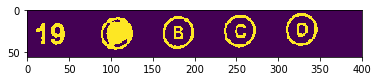

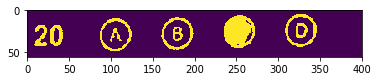

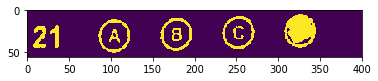

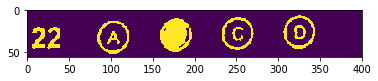

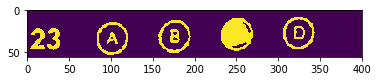

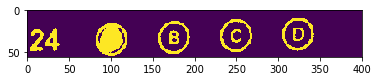

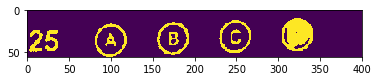

In [67]:
top=0
bottom=56
for i in range(25):
    q=img1[top:bottom,:]
    questions.append(q)
    plt.imshow(q)
    plt.show()
    top=bottom
    bottom=bottom+56

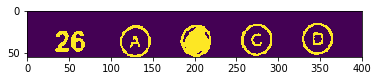

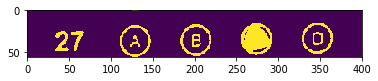

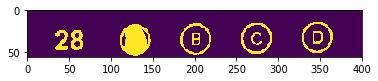

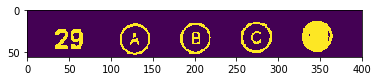

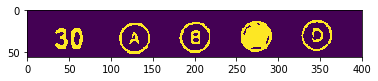

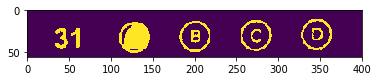

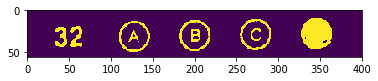

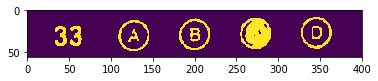

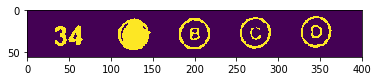

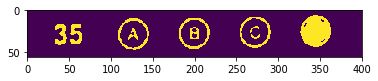

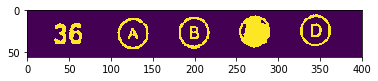

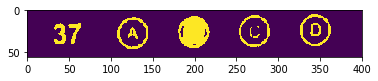

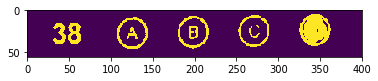

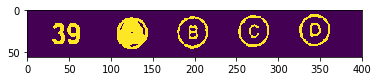

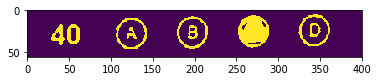

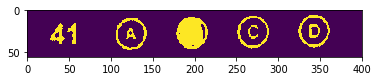

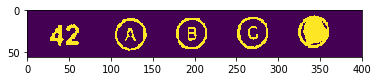

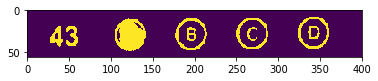

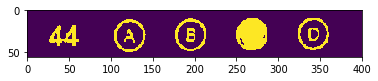

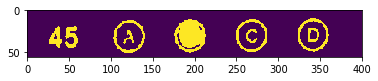

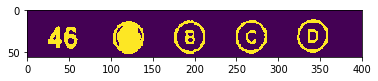

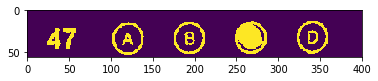

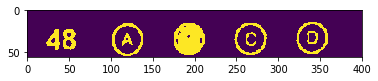

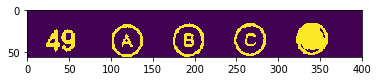

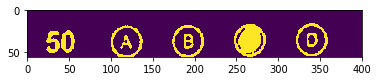

In [68]:
top=0
bottom=55
for i in range(25):
    q=img2[top:bottom,:]
    questions.append(q)
    plt.imshow(q)
    plt.show()
    top=bottom
    bottom=bottom+56

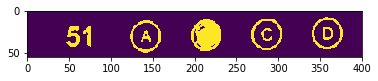

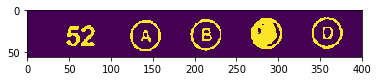

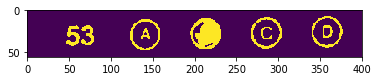

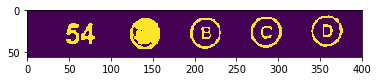

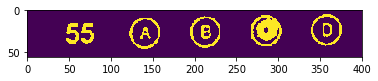

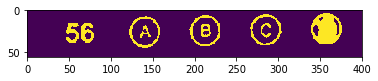

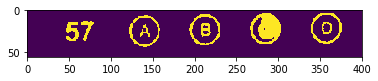

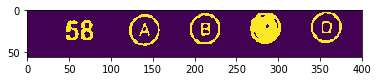

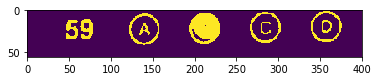

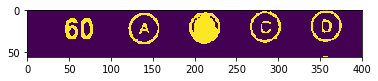

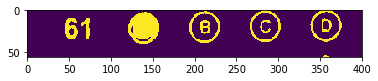

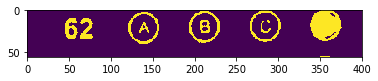

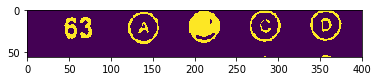

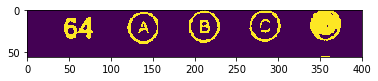

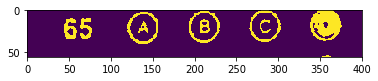

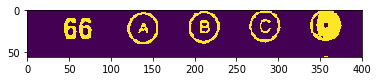

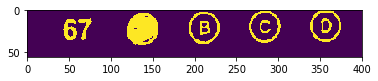

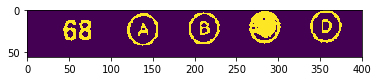

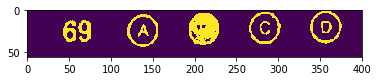

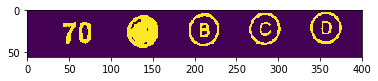

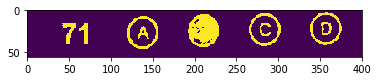

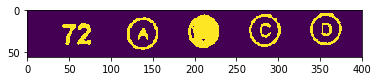

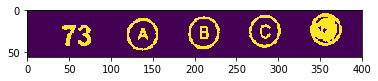

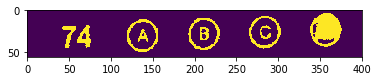

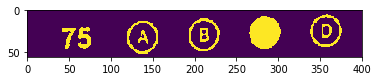

In [69]:
top=0
bottom=55
for i in range(25):
    q=img3[top:bottom,:]
    questions.append(q)
    plt.imshow(q)
    plt.show()
    top=bottom
    bottom=bottom+56

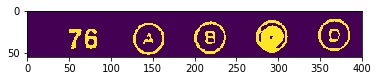

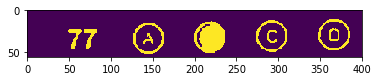

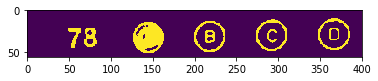

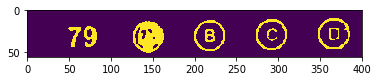

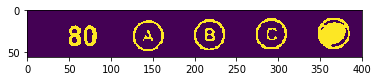

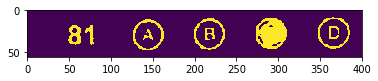

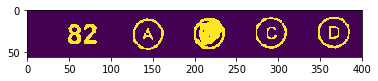

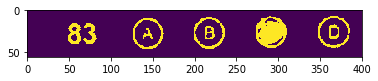

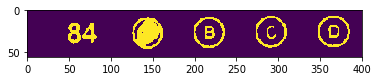

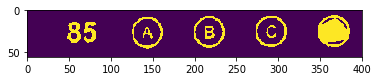

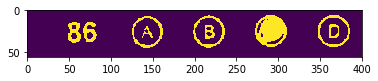

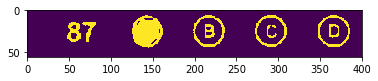

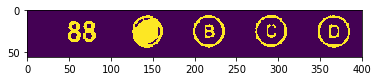

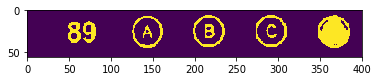

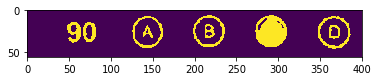

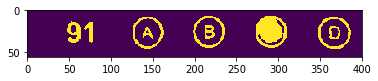

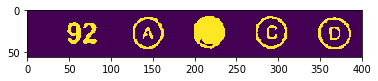

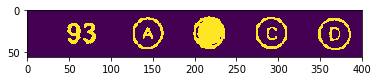

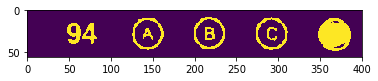

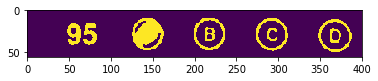

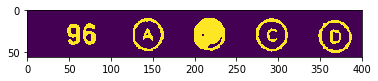

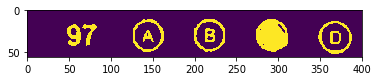

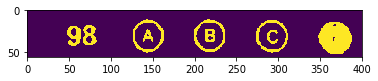

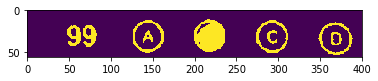

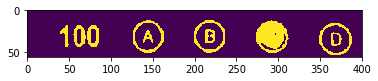

In [70]:
top=0
bottom=55
for i in range(25):
    q=img4[top:bottom,:]
    questions.append(q)
    plt.imshow(q)
    plt.show()
    top=bottom
    bottom=bottom+56

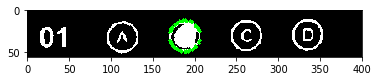

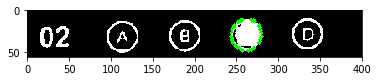

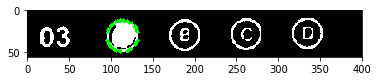

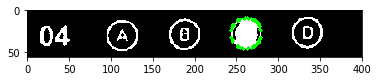

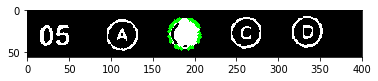

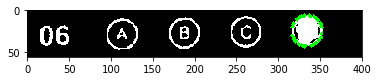

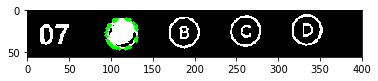

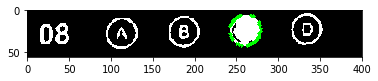

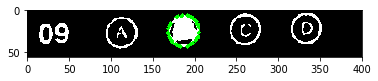

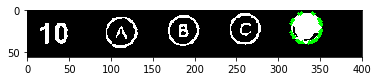

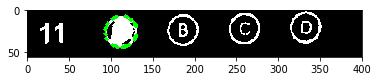

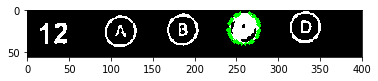

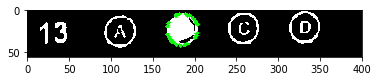

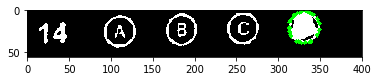

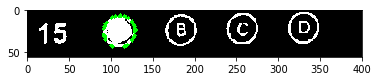

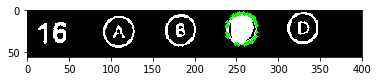

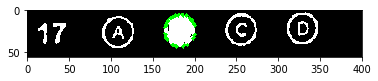

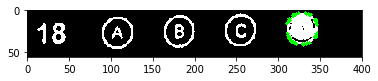

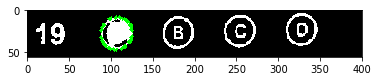

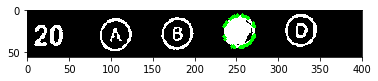

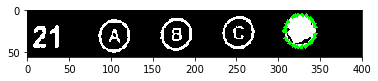

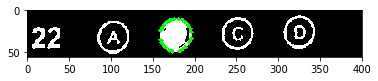

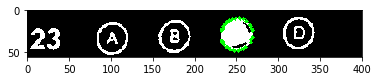

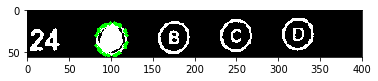

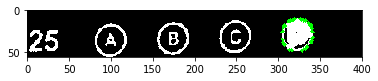

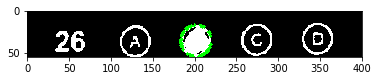

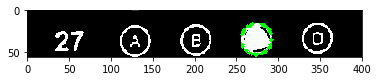

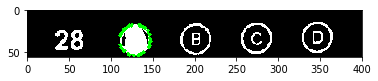

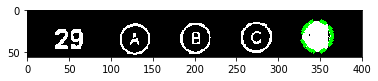

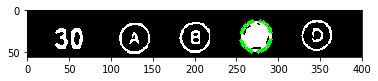

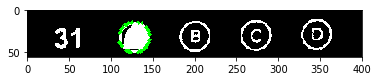

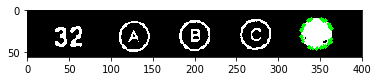

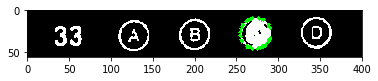

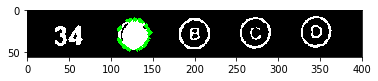

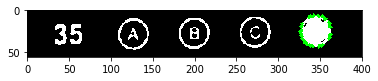

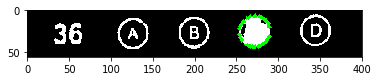

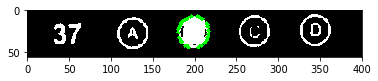

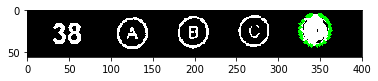

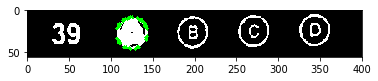

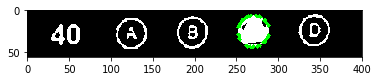

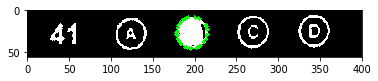

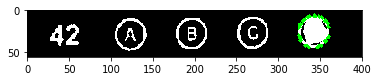

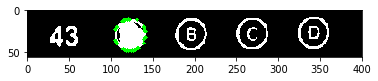

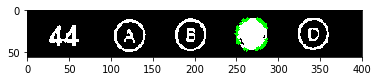

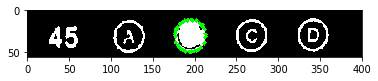

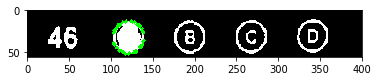

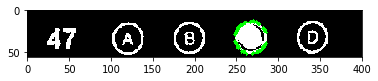

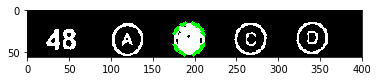

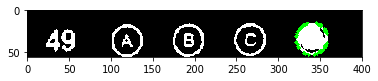

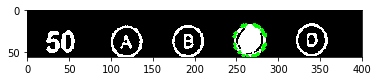

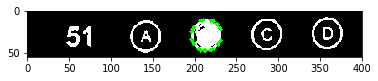

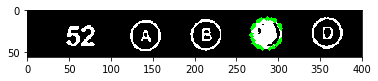

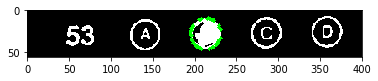

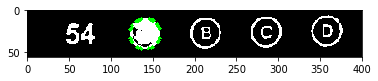

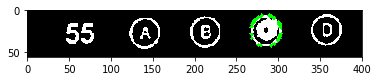

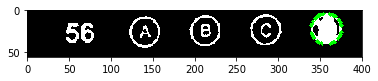

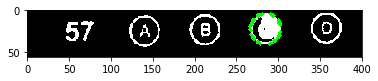

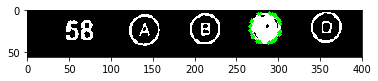

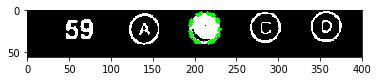

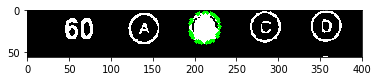

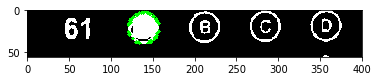

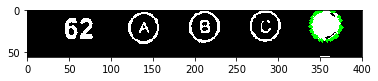

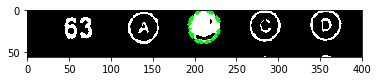

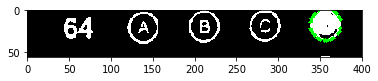

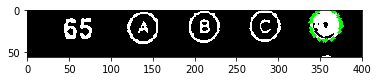

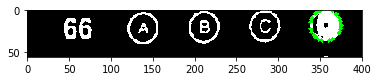

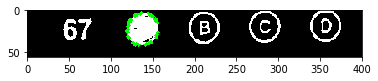

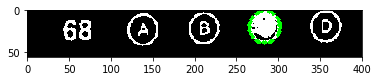

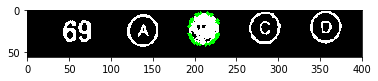

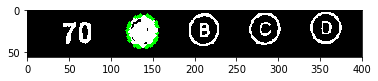

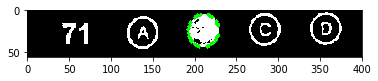

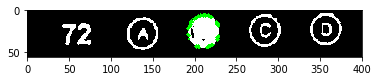

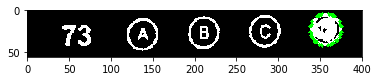

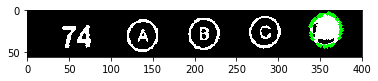

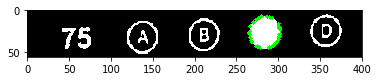

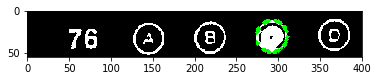

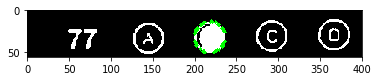

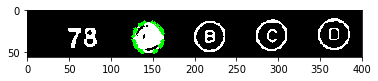

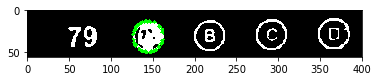

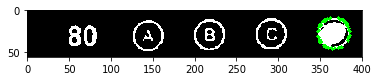

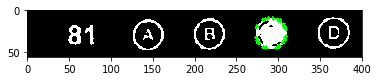

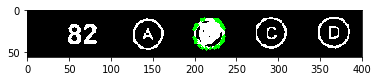

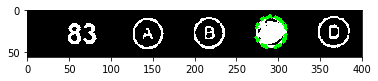

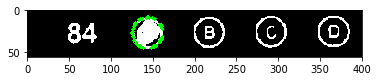

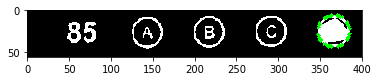

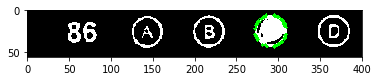

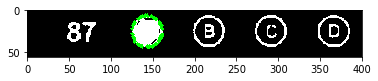

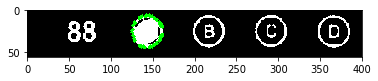

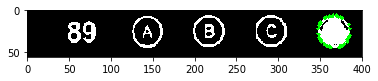

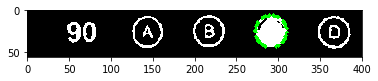

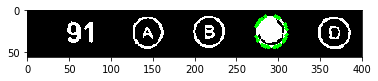

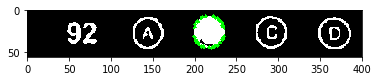

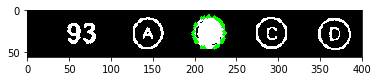

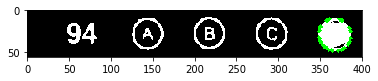

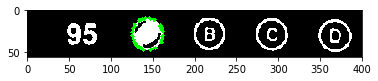

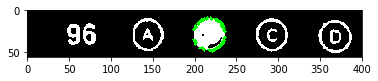

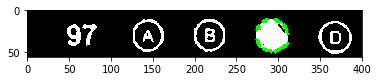

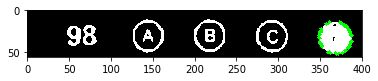

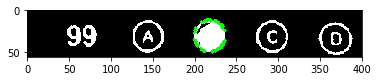

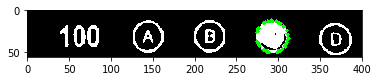

In [78]:
for jkl in range(100):
    q1=questions[jkl]
    q=q1
    cimg=cv2.cvtColor(q,cv2.COLOR_GRAY2BGR)
    cnts = cv2.findContours(q.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    questionCnts = []

    # loop over the contours
    for c in cnts:
        # compute the bounding box of the contour, then use the
        # bounding box to derive the aspect ratio
        (x, y, w, h) = cv2.boundingRect(c)
        ar = w / float(h)
        #if aspect ratio between 0 and 999 accept it
        if w >= 20 and h >= 20 and ar >= 0 and ar <= 999:
            questionCnts.append(c)
    cnts=contours.sort_contours(questionCnts[:4])[0]
    bubbled=None
    for (j, c) in enumerate(cnts):
        #create a mask for circle
        mask = np.zeros(q1.shape, dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)

            # apply the mask to the thresholded image, then
            # count the number of non-zero pixels in the
            # bubble area
        mask = cv2.bitwise_and(q1, q1, mask=mask)
        total = cv2.countNonZero(mask)

            # if the current total has a larger number of total
            # non-zero pixels, then we are examining the currently
            # bubbled-in answer
        if bubbled is None or total > bubbled[0]:
            bubbled = (total, j)
    color=(0,255,0)
    cv2.drawContours(cimg,cnts[bubbled[1]],-1,color,3)
    plt.imshow(cimg)
    plt.show()